In [1]:
# importing dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
, MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In [2]:
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
labels = df["MYOPIC"]
labels.value_counts().nunique()

2

In [4]:
# Removing the "MYOPIC" column from the dataset.
df = df.drop('MYOPIC', axis=1)

In [5]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [6]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
# Standarising the dataset so that columns that contain larger values do not influence 
# the outcome more than columns with smaller values:

# Creating a scaler to standardize the data
scaler = StandardScaler()

# Training the scaler with the data.
X_scaled = scaler.fit_transform(df)

In [8]:
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

## Part 2: Apply Dimensionality Reduction

In [9]:
# Performing dimensionality reduction with PCA. 
pca = PCA(n_components=0.9)

myopia_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_.sum()

0.9187361702915186

In [10]:
# Getting the shape of features after reduction
myopia_pca.shape

(618, 10)

In [11]:
#Further reducing the dataset dimensions with t-SNE and visually inspecting the results.
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, n_iter=2500)
tsne_features = tsne.fit_transform(myopia_pca)

F:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
tsne_features.shape

(618, 3)

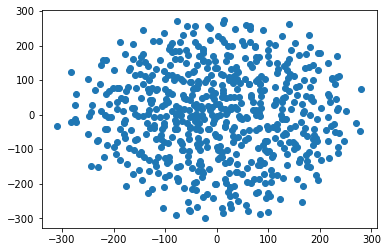

In [13]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


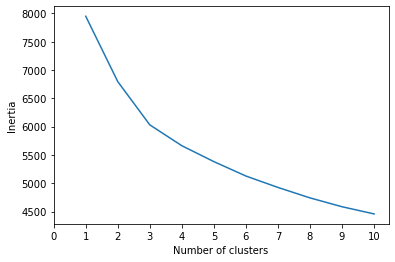

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


In [14]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(myopia_pca)
    u = km.inertia_
    inertia.append(u)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

The elbow appears at k =3

In [16]:
# Using Inertia Value for Finding Optimal Hyperparameters

init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=3, random_state=42, init=init)
    kmeans_model.fit(df)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

,Inertia Value
k-means++,93108.597058
random,93108.597058


In [17]:
# Transforming PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, 
    columns=["principal component 1", "principal component 2", "principal component 3",              "principal component 4", "principal component 5", "principal component 6",              "principal component 7", "principal component 8", "principal component 9",              "principal component 10"]
)

#df_myopia_pca['class']= km.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [18]:
# Perform cluster prediction with k=3 using k-means algorithm
model = KMeans(n_clusters=3, random_state=0)

# Fit the k-means model to the data
model.fit(df_myopia_pca)

# Use the trained k-means model to predict the cluster labels of the data
predictions = model.predict(df_myopia_pca)

# Add the predicted class column to the original data frame
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


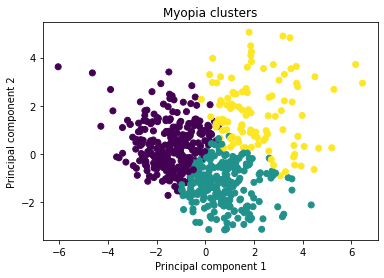

In [19]:
# Visualising the clusters
plt.scatter(x=df_myopia_pca['principal component 1'], y=df_myopia_pca['principal component 2'], c=df_myopia_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

Elbow curve indicates patients can be clustered, and based on scatter plot, 5 clusters can be identified.

The optimal number of clusters is 3.

T-SNE was not helpful in finding distinct clusters.

Cluster Analysis with K-means performed better, although the clusters were not clearly distinct.

A bigger dataset is recommended, as well as splitting the data into test and training to test the model.